## Observations and Insights 

1. For the Capomulin regimen, the correlation coefficient between mouse weight and average tumor volume is 0.53. This shows a moderate positive correlation coefficient betwee the weight and the tumor volume. The heavier the mice, the higher tumor volume they have and less effietive the treatment is.

2. If controlling for the initial tumor volume,  Capomulin and Ramicane seem to be the two most effective drugs compared to other treatments based on the statistics table and box plot analysis

3. Capomulin reduced the turmor volume for 48% over the time period


In [ ]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [5]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='inner')
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
merged_df["Mouse ID"].count()

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"])==True]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first')
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].count()

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean of the tumor volume
mean_tumor_volume = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

#median of the tumor volume
median_tumor_volume = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# variance of the tumor volume
var_tumor_volume = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# standard deviation of the tumor volume
std_tumor_volume = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# SEM of the tumor volume. 
sem_tumor_volume = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.
statistics_df = pd.DataFrame({
    "Mean": mean_tumor_volume,
    "Median": median_tumor_volume,
    "Variance": var_tumor_volume,
    "Standard Deviation": std_tumor_volume,
    "SEM": sem_tumor_volume
})

statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_group = cleaned_df.groupby('Drug Regimen')
drug_group = drug_group[['Tumor Volume (mm3)']]

statistics_df_2 = drug_group.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
statistics_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

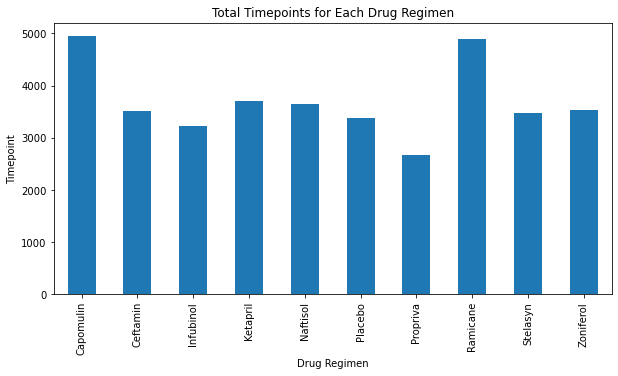

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#  Filter the DataFrame down only to those columns to chart
total_timepoint = cleaned_df.set_index('Drug Regimen').groupby('Drug Regimen').sum()['Timepoint']

total_timepoint.plot(kind='bar', figsize = (10,5))

plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.savefig("../Images/drug_regimen_pandas.png")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

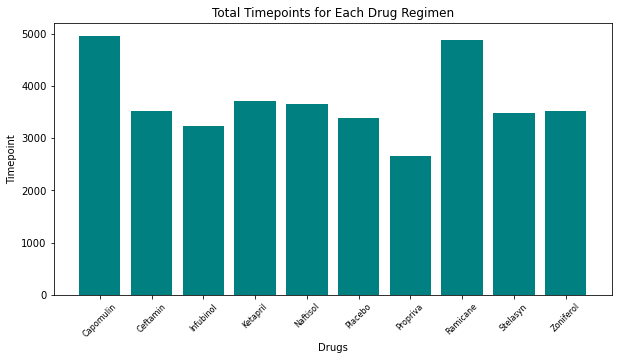

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#  Filter the DataFrame down only to those columns to chart
total_timepoint = cleaned_df.set_index('Drug Regimen').groupby('Drug Regimen').sum()['Timepoint']

# Set y-axis
y_axis = total_timepoint.unique()

# Set x_axis
x_axis = np.arange(len(y_axis))

#List of the ticks
drugs = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol' ,'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']


# Create the bar chart
plt.figure(figsize=(10,5))
plt.bar(x_axis,y_axis,color='teal', align='center')

tick_location = [value for value in x_axis]

plt.xticks(tick_location, drugs, fontsize=8, rotation=45)

plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Timepoint")

plt.savefig("../Images/drug_regimen_pyplot.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

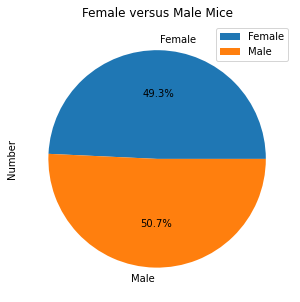

<Figure size 720x720 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#  Filter the DataFrame down only to those columns to chart
sex_df = cleaned_df.set_index('Sex').groupby('Sex').count()

pie_sex_df = pd.DataFrame({
    'Sex':['Female','Male'],
    'Number': [930,958]})

pie_sex_df.groupby('Sex').sum().plot(kind="pie", y='Number',figsize = (5,5), autopct="%1.1f%%")

plt.title("Female versus Male Mice")
plt.figure(figsize=(10,10))

plt.savefig("../Images/male_vs_female_pandas.png")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

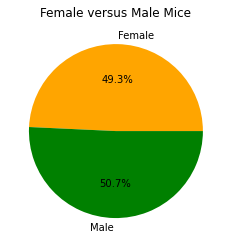

<Figure size 720x720 with 0 Axes>

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
sex_df = cleaned_df.set_index('Sex').groupby('Sex').count()
sex_df[['Mouse ID']]

labels = ['Female','Male']
sizes = [930, 958]
colors = ['orange', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%" )

plt.title("Female versus Male Mice")
plt.figure(figsize=(10,10))

plt.savefig("../Images/male_vs_female_pyplot.png")

plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = cleaned_df.loc[cleaned_df['Drug Regimen'] =='Capomulin']
capomulin = capomulin[['Mouse ID','Drug Regimen', 'Timepoint','Tumor Volume (mm3)']].groupby("Mouse ID")

ramicane = cleaned_df.loc[cleaned_df['Drug Regimen']=='Ramicane']
ramicane = ramicane[['Mouse ID','Drug Regimen', 'Timepoint','Tumor Volume (mm3)']].groupby("Mouse ID")

infubinol = cleaned_df.loc[cleaned_df['Drug Regimen']=='Infubinol']
infubinol = infubinol[['Mouse ID','Drug Regimen', 'Timepoint','Tumor Volume (mm3)']].groupby("Mouse ID")

ceftamin = cleaned_df.loc[cleaned_df['Drug Regimen']=="Ceftamin"]
ceftamin = ceftamin[['Mouse ID','Drug Regimen', 'Timepoint','Tumor Volume (mm3)']].groupby("Mouse ID")



# Start by getting the last (greatest) timepoint for each mouse
capomulin_max_df = pd.DataFrame(capomulin.max()['Timepoint'])

ramicane_max_df = pd.DataFrame(ramicane.max()['Timepoint'])

infubinol_max_df = pd.DataFrame(infubinol.max()['Timepoint'])

ceftamin_max_df = pd.DataFrame(ceftamin.max()['Timepoint'])

In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_cap = pd.merge(capomulin_max_df, cleaned_df, on=("Mouse ID","Timepoint"), how='left')
cap_tuomr_vol = merged_cap['Tumor Volume (mm3)']

merged_ram = pd.merge(ramicane_max_df, cleaned_df, on=("Mouse ID","Timepoint"), how='left')
ram_tumor_vol = merged_ram['Tumor Volume (mm3)']

merged_inf = pd.merge(infubinol_max_df, cleaned_df, on=("Mouse ID","Timepoint"), how='left')
inf_tumor_vol = merged_inf['Tumor Volume (mm3)']

merged_cef = pd.merge(ceftamin_max_df, cleaned_df, on=("Mouse ID","Timepoint"), how='left')
cef_tumor_vol = merged_cef['Tumor Volume (mm3)']

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_quartiles = cap_tuomr_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

ram_quartiles = ram_tumor_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

inf_quartiles = inf_tumor_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

cef_quartiles = cef_tumor_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq


In [19]:
# Determine outliers using upper and lower bounds of Capomulin
print(f"The lower quartile of Capomulin tumors: {cap_lowerq}")
print(f"The upper quartile of Capomulin tumors: {cap_upperq}")
print(f"The interquartile range of Capomulin tumors: {cap_iqr}")
print(f"The median of Capomulin tumors: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
# Determine outliers using upper and lower bounds of Ramicane
print(f"The lower quartile of Ramicane tumors: {ram_lowerq}")
print(f"The upper quartile of Ramicane tumors: {ram_upperq}")
print(f"The interquartile range of Ramicane tumors: {ram_iqr}")
print(f"The median of Ramicane tumors: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
# Determine outliers using upper and lower bounds of Infubinol
print(f"The lower quartile of Capomulin tumors: {inf_lowerq}")
print(f"The upper quartile of Capomulin tumors: {inf_upperq}")
print(f"The interquartile range of Capomulin tumors: {inf_iqr}")
print(f"The median of Capomulin tumors: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*cap_iqr)
inf_upper_bound = inf_upperq + (1.5*cap_iqr)

print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 54.04860769
The upper quartile of Capomulin tumors: 65.52574285
The interquartile range of Capomulin tumors: 11.477135160000003
The median of Capomulin tumors: 60.16518046 
Values below 42.375812499999995 could be outliers.
Values above 77.19853804 could be outliers.


In [22]:
# Determine outliers using upper and lower bounds of Ceftamin
print(f"The lower quartile of Capomulin tumors: {cef_lowerq}")
print(f"The upper quartile of Capomulin tumors: {cef_upperq}")
print(f"The interquartile range of Capomulin tumors: {inf_iqr}")
print(f"The median of Capomulin tumors: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cap_iqr)
cef_upper_bound = cef_upperq + (1.5*cap_iqr)

print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 48.72207785
The upper quartile of Capomulin tumors: 64.29983003
The interquartile range of Capomulin tumors: 11.477135160000003
The median of Capomulin tumors: 59.85195552 
Values below 37.04928265999999 could be outliers.
Values above 75.97262522 could be outliers.


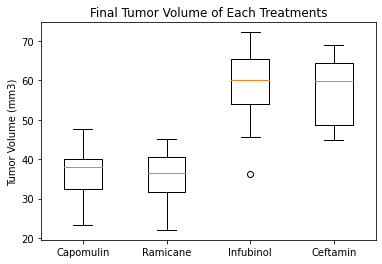

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [cap_tuomr_vol,ram_tumor_vol,inf_tumor_vol,cef_tumor_vol]
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(plot_data,  labels= treatments)
plt.show()

plt.savefig("../Images/four_treatments_boxplotg")

## Line and Scatter Plots

   Mouse ID  Tumor Volume (mm3)  Timepoint
10     s185           45.000000          0
11     s185           43.878496          5
12     s185           37.614948         10
13     s185           38.177232         15
14     s185           36.866876         20
15     s185           33.949940         25
16     s185           32.959671         30
17     s185           28.328531         35
18     s185           25.472143         40
19     s185           23.343598         45


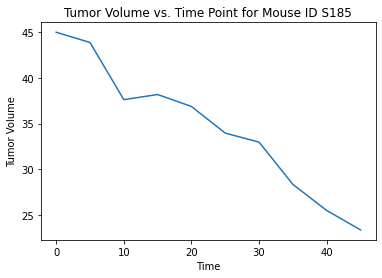

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
volume_time_df = capomulin_df[['Mouse ID', 'Tumor Volume (mm3)','Timepoint']]
s185_mouse = volume_time_df.loc[volume_time_df['Mouse ID']== 's185']
print(s185_mouse)

volume = s185_mouse['Tumor Volume (mm3)']
time = s185_mouse['Timepoint']

plt.plot(time, volume)
plt.title('Tumor Volume vs. Time Point for Mouse ID S185')
plt.xlabel('Time')
plt.ylabel('Tumor Volume')

plt.savefig("../Images/tumor_volume_mouse_S185.png")

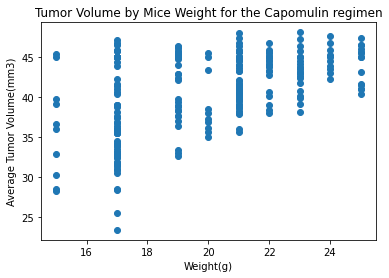

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
tumor_weight_df = capomulin_df[['Tumor Volume (mm3)','Weight (g)']]
tumor_weight_df

weight = tumor_weight_df['Weight (g)']
tumor = tumor_weight_df['Tumor Volume (mm3)']

plt.scatter(weight,tumor,marker="o")

plt.title('Tumor Volume by Mice Weight for the Capomulin regimen')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')

plt.savefig("../Images/tumor_weight_scatter.png")

plt.show() 

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = st.pearsonr(weight, tumor)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation_coefficient[0],2)}") 

The correlation coefficient between mouse weight and average tumor volume is 0.53


The r-squared is: 0.2763600223455911


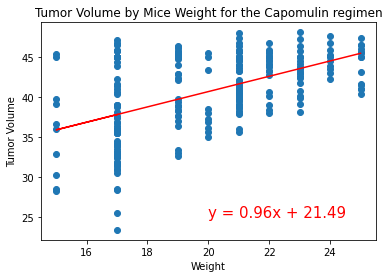

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = tumor_weight_df['Weight (g)']
y_values = tumor_weight_df['Tumor Volume (mm3)']

#Calculate the slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Calculate the regression
regress_values = x_values * slope + intercept

#Plot the scatterplot and make the regression line and equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

#Add labeld and title
plt.title('Tumor Volume by Mice Weight for the Capomulin regimen')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../Images/tumor_weight_scatter2.png")